In [1]:
# import nacessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# read the json file 
df = pd.read_json("full_format_recipes.json")
ff = df.copy()

### Data Preprocessing

In [3]:
df.head()

,directions,fat,date,categories,calories,desc,protein,rating,title,ingredients,sodium
0,"[1. Place the stock, lentils, celery, carrot, ...",7.0,2006-09-01 04:00:00+00:00,"[Sandwich, Bean, Fruit, Tomato, turkey, Vegeta...",426.0,None,30.0,2.500,"Lentil, Apple, and Turkey Wrap","[4 cups low-sodium vegetable or chicken stock,...",559.0
1,[Combine first 9 ingredients in heavy medium s...,23.0,2004-08-20 04:00:00+00:00,"[Food Processor, Onion, Pork, Bake, Bastille D...",403.0,This uses the same ingredients found in boudin...,18.0,4.375,Boudin Blanc Terrine with Red Onion Confit,"[1 1/2 cups whipping cream, 2 medium onions, c...",1439.0
2,[In a large heavy saucepan cook diced fennel a...,7.0,2004-08-20 04:00:00+00:00,"[Soup/Stew, Dairy, Potato, Vegetable, Fennel, ...",165.0,None,6.0,3.750,Potato and Fennel Soup Hodge,"[1 fennel bulb (sometimes called anise), stalk...",165.0
3,[Heat oil in heavy large skillet over medium-h...,NaN,2009-03-27 04:00:00+00:00,"[Fish, Olive, Tomato, Sauté, Low Fat, Low Cal,...",NaN,The Sicilian-style tomato sauce has tons of Me...,NaN,5.000,Mahi-Mahi in Tomato Olive Sauce,"[2 tablespoons extra-virgin olive oil, 1 cup c...",NaN
4,[Preheat oven to 350°F. Lightly grease 8x8x2-i...,32.0,2004-08-20 04:00:00+00:00,"[Cheese, Dairy, Pasta, Vegetable, Side, Bake, ...",547.0,None,20.0,3.125,Spinach Noodle Casserole,"[1 12-ounce package frozen spinach soufflé, th...",452.0


In [4]:
df.drop(columns = ['directions','desc'], inplace = True)

#### Handel Outliers (unusual behaviour data)

In [5]:
# Now run the describe method again
df.describe()

,fat,calories,protein,rating,sodium
count,1.590800e+04,1.597600e+04,15929.000000,20100.000000,1.597400e+04
mean,3.460975e+02,6.307857e+03,99.946199,3.713060,6.211474e+03
std,2.043102e+04,3.585851e+05,3835.616663,1.343144,3.328903e+05
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,7.000000e+00,1.980000e+02,3.000000,3.750000,8.000000e+01
50%,1.700000e+01,3.310000e+02,8.000000,4.375000,2.940000e+02
75%,3.300000e+01,5.860000e+02,27.000000,4.375000,7.110000e+02
max,1.722763e+06,3.011122e+07,236489.000000,5.000000,2.767511e+07


In [6]:
# We have the extreme positive values that we should remove 
#The skewness data indicates that data does not follow the normal distribution means we can use the IQR method to remove the extrime values
df[['fat','calories','protein','sodium']].skew()

fat         78.247565
calories    77.120025
protein     53.629979
sodium      75.403816
dtype: float64

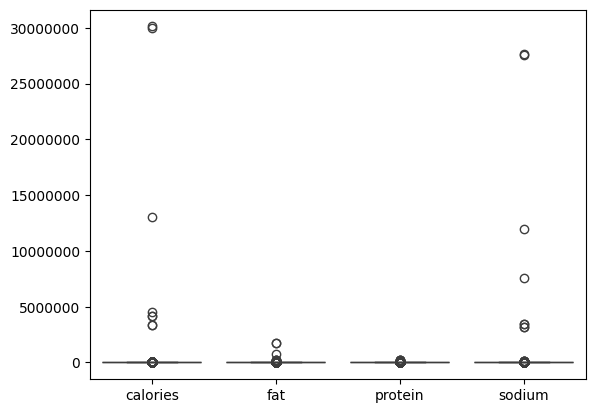

In [7]:
sns.boxplot(df[['calories','fat','protein','sodium']])

# Use ticklabel_format to disable scientific notation
plt.ticklabel_format(style='plain', axis='y')

In [8]:
# calculate the upper and lower bounds using iqr method
# behave the outliers as the null values (beacaus outlier data was the wrong data in our case and not the right data)

for i in ['calories','fat','protein','sodium']:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    df.loc[df[i] > upper,i] = np.nan

print('scussessful')

scussessful


<Axes: xlabel='calories', ylabel='Density'>

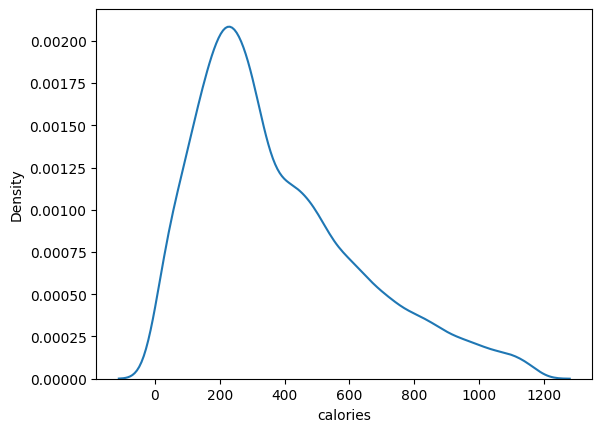

In [9]:
# distribuiton of the data after handeling the outliers
sns.kdeplot(df.calories)

<Axes: xlabel='fat', ylabel='Density'>

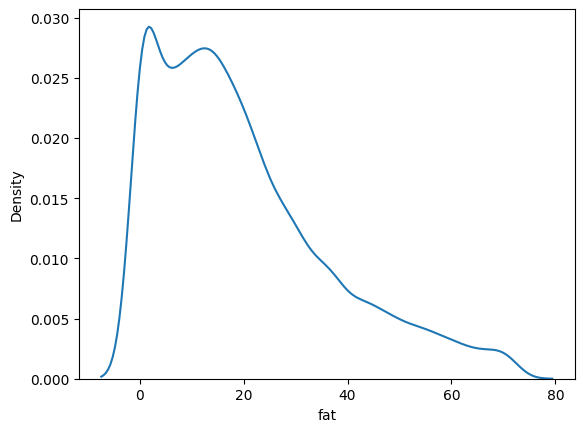

In [10]:
# distribuiton of the data after handeling the outliers
sns.kdeplot(df.fat)

<Axes: xlabel='protein', ylabel='Density'>

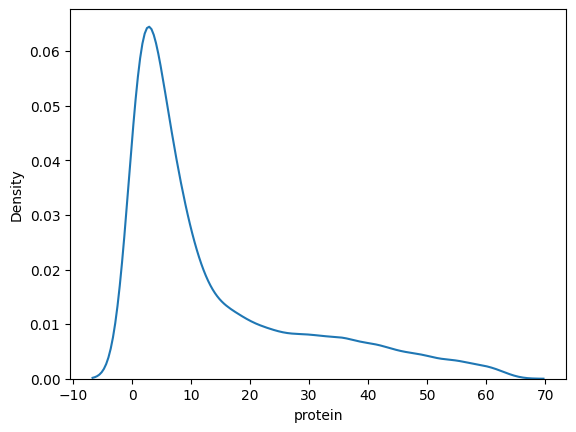

In [11]:
# distribuiton of the data after handeling the outliers
sns.kdeplot(df.protein)

<Axes: xlabel='sodium', ylabel='Density'>

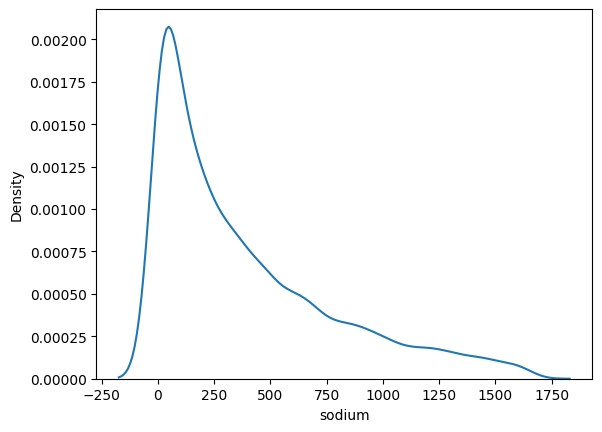

In [12]:
sns.kdeplot(df.sodium)

### Logical Maximum Values for Nutritional Data

- **Calories**:  
   - **Maximum**: **2,500 calories**  
   - **Why**: This would account for very large or indulgent meals (e.g., heavy pasta dishes, burgers, large portions). Anything beyond this for a single recipe would typically be unusual, except for multi-serving dishes.

- **Protein**:  
   - **Maximum**: **150g of protein**  
   - **Why**: High-protein meals like steaks or bodybuilder diets may have up to 150g of protein, but anything above this is likely incorrect.

- **Sodium**:  
   - **Maximum**: **3,000mg of sodium**  
   - **Why**: Even very salty dishes (e.g., processed foods, cured meats) should rarely exceed 3,000mg per serving. Beyond this, it’s likely a data error or an extremely unhealthy recipe.

- **Fat**:  
   - **Maximum**: **150g of fat**  
   - **Why**: High-fat dishes (e.g., deep-fried foods or certain keto recipes) might reach 100-150g of fat, but anything above this is very uncommon.

   -
   
- ###  **NOTE**: In overcase the outliers was the wrong data so we removed the data using the iqr method because the data was also Not following the normal distribution.



#### Checking Null Values

In [13]:
(df.isnull().sum() / len(df)) * 100

fat            26.462991
date            0.094386
categories      0.094386
calories       25.697963
protein        26.423249
rating          0.149031
title           0.094386
ingredients     0.094386
sodium         26.428217
dtype: float64

In [14]:
# we drop the rows that dose't have any category (because we impute the nurtritional values on the bases of category)
df.dropna(subset = 'categories',inplace = True)

# in the category column we have empty list so remove them
df.drop(index = df[df.categories.apply(lambda x:len(x)) ==0].index, inplace = True)

In [15]:
# Twenty percent of the recipe data lacks crucial information on fat, sodium, and protein. 

(df[['calories','protein','sodium']].sum(axis = 1) == 0).sum() / len(df) 

0.22152403750249353

In [16]:
# number of rows that have 0  nurtritional values
# we can consider them a null values

print(f"protein:- {len(df[df['protein'] == 0])}")

print(f"sodium:- {len(df[df['sodium'] == 0])}")

print(f"calories:- {len(df[df['calories'] == 0])}")

print(f"fat:- {len(df[df['fat'] == 0])}")


protein:- 851
sodium:- 61
calories:- 13
fat:- 1223


In [17]:
for i in ['calories','protein','sodium','fat']:
    df.loc[df[i] == 0,i] = np.nan
    

# after fill the null values checking does we have still 0 nurtritional values

print(f"protein:- {len(df[df['protein'] == 0])}")

print(f"sodium:- {len(df[df['sodium'] == 0])}")

print(f"calories:- {len(df[df['calories'] == 0])}")

print(f"fat:- {len(df[df['fat'] == 0])}")

protein:- 0
sodium:- 0
calories:- 0
fat:- 0


In [18]:
temp_df = df.dropna()

In [19]:
categories_df = temp_df[['categories','protein','sodium','fat','calories']].explode('categories')

In [20]:
# now we have the mean nurtritional values for each category 
# if any recipe dose't have nurtritional values we can impute them with the help of categories mean value from which they belong 

C_N_AVG_Value = round(categories_df.groupby(['categories']).agg({'calories': 'mean', 'protein': 'mean', 'sodium': 'mean', 'fat': 'mean'}),2)
C_N_AVG_Value.reset_index(inplace = True)
C_N_AVG_Value.head(5)

,categories,calories,protein,sodium,fat
0,#CAKEWEEK,644.75,12.00,246.25,40.00
1,#WasteLess,186.00,3.00,197.00,8.00
2,22-Minute Meals,534.71,31.14,918.71,22.57
3,3-Ingredient Recipes,359.88,9.82,386.29,20.18
4,30 Days of Groceries,736.00,34.50,1273.50,42.25


In [21]:
# impute the values in the dataframe

for row_no in df[~df.index.isin(temp_df.index)].index:

    # avg nutritional values of categories from which the row belongs -> (a recipe can belong from many categories in this we took the mean of all the categories 
    # that the recipe belongs to)

    calo = round(C_N_AVG_Value.loc[C_N_AVG_Value.categories.isin(df.loc[row_no,'categories']),'calories'].mean(),2)
    f = round(C_N_AVG_Value.loc[C_N_AVG_Value.categories.isin(df.loc[row_no,'categories']),'fat'].mean(),2)
    so = round(C_N_AVG_Value.loc[C_N_AVG_Value.categories.isin(df.loc[row_no,'categories']),'sodium'].mean(),2)
    pro = round(C_N_AVG_Value.loc[C_N_AVG_Value.categories.isin(df.loc[row_no,'categories']),'protein'].mean(),2)


    if not str(df.loc[row_no,'calories']).isdigit():
        df.loc[row_no,'calories'] = calo

    if not str(df.loc[row_no,'fat']).isdigit():
        df.loc[row_no,'fat'] = f

    if not str(df.loc[row_no,'sodium']).isdigit():
        df.loc[row_no,'sodium'] = so

    if not str(df.loc[row_no,'protein']).isdigit():
        df.loc[row_no,'protein'] = pro

print('Successful')

Successful


In [22]:
df.isnull().sum()

fat            0
date           0
categories     0
calories       0
protein        0
rating         0
title          0
ingredients    0
sodium         0
dtype: int64

In [23]:
df.title.duplicated().sum()

2316

In [24]:
df.title.value_counts()

title
Pastry Dough                                   28
Chicken Stock                                  26
Turkey Giblet Stock                            20
Turkey Stock                                   15
Simple Syrup                                   13
                                               ..
Fruity Lemonade Ice Pops                        1
Szechwan-Style Eggplant with Pita Wedges        1
Poached Eggs with Tomato Cilantro Sauce         1
Greens and Grains Scramble                      1
Baked Ham with Marmalade-Horseradish Glaze      1
Name: count, Length: 17736, dtype: int64

In [25]:
# check the recipe that have multiple entries
df[df.title == 'Pastry Dough ']


# """As we can see the title of the recipes are the same but the ingredients and categories are different in some of them"""

,fat,date,categories,calories,protein,rating,title,ingredients,sodium
126,16.00,2004-08-20 04:00:00+00:00,"[Blender, Food Processor, Dairy, Chill, Gourmet]",234.00,3.00,5.000,Pastry Dough,[3/4 stick (6 tablespoons) cold unsalted butte...,99.00
1082,16.00,2004-08-20 12:48:48+00:00,"[Dairy, Dessert, Winter, Gourmet, Sugar Consci...",234.00,3.00,0.000,Pastry Dough,[3/4 stick (6 tablespoons) cold unsalted butte...,99.00
1180,19.00,2006-10-19 17:44:42+00:00,"[Dessert, Thanksgiving, Chill, Gourmet, Sugar ...",287.00,4.00,4.375,Pastry Dough,"[1 1/4 cups all-purpose flour, 3/4 stick (6 ta...",128.00
1254,19.20,2004-08-20 04:00:00+00:00,"[Food Processor, Dessert, Bake, Thanksgiving, ...",348.86,10.07,5.000,Pastry Dough,"[1 1/4 cups all-purpose flour, 3/4 stick (6 ta...",315.91
2103,16.00,2004-08-20 04:00:00+00:00,"[Blender, Food Processor, No-Cook, Vegetarian,...",234.00,3.00,5.000,Pastry Dough,"[1 1/4 cups all-purpose flour, 3/4 stick (6 ta...",99.00
3373,16.00,2004-08-20 04:00:00+00:00,"[Food Processor, Thanksgiving, Chill, Gourmet]",233.00,3.00,5.000,Pastry Dough,"[1 stick ( 1/2 cup) cold unsalted butter, 1 1/...",196.00
3744,19.00,2008-10-16 04:00:00+00:00,"[Christmas, Thanksgiving, Christmas Eve, Gourmet]",276.00,3.00,5.000,Pastry Dough,"[2 1/2 cups all-purpose flour, 2 sticks cold u...",120.00
5654,16.00,2004-08-20 04:00:00+00:00,"[Blender, Food Processor, No-Cook, Vegetarian,...",234.00,3.00,5.000,Pastry Dough,"[1 1/4 cups all-purpose flour, 3/4 stick (6 ta...",99.00
6084,19.04,2004-08-20 04:00:00+00:00,"[Dessert, Bake, Christmas, Winter, Pastry, Gou...",349.75,9.96,5.000,Pastry Dough,"[1 1/4 cups all-purpose flour, 3/4 stick (6 ta...",311.71
6635,19.00,2008-10-16 04:00:00+00:00,"[Christmas, Thanksgiving, Christmas Eve, Gourmet]",276.00,3.00,5.000,Pastry Dough,"[2 1/2 cups all-purpose flour, 2 sticks cold u...",120.00


In [26]:
# we should remove the rows that have the same information in all columns mean duplicated rows
#df.dupliated not works because we have the list in columns so first we convert the list into string then check for duplicates

df['new_category'] = df.categories.apply(lambda x: ' '.join(sorted(x)))

df['new_ingredients'] = df.ingredients.apply(lambda x: ' '.join(sorted(x)))


In [27]:
# also extract the month and date and create the new column

df['year'] = df.date.dt.year
df['month'] = df.date.dt.month


In [28]:

duplicate_row_index = df[df[['fat','calories','protein','sodium','title','new_ingredients','new_category','year','month','rating']].duplicated()].index

df.drop(index = duplicate_row_index, inplace = True)

In [29]:
# now we can drop the columns that we cretate just to check the duplicate rows 
# also drop the date columns beacause we already extract the year and month column for analysis

df.drop(columns = ['new_category','new_ingredients'], inplace = True)
df.drop(columns = ['date'], inplace = True)

### Data Preprocessing Steps

1. **Dropped the `desc` and `directions` columns**:
   - **Why**: These columns had text about how to make the recipe (`directions`) and a short description (`desc`). Since we already have the `ingredients` column, which gives similar information in a more useful way, we decided to drop both `desc` and `directions` to avoid duplication.

2. **Identified and removed outliers**:
   - **Why**: During our analysis, we found that some of the nutritional values (like protein, fat, calories, and sodium) were unusually high, which indicated potential errors in the data. Based on domain knowledge, we determined that a single serving of a dish shouldn’t have excessively high nutritional values. This likely resulted from incorrect entries or data meant for multiple servings but recorded as a single serving.
   - **Action**: We used the **Interquartile Range (IQR)** method to detect and remove outliers from the dataset. Since the data was heavily skewed, we applied this technique to filter out extremely high values for protein, fat, calories, and sodium, ensuring a more realistic and accurate dataset for further analysis.

3. **Handled missing values in `sodium`, `protein`, `calories`, and `fat` columns**:
   - **New Method**: Instead of removing rows with missing values, we imputed the missing data using category-based averages. We calculated the average nutritional values for each category, and for recipes belonging to multiple categories, we took the mean of those averages to fill in the missing values.
   - **Example**: If a recipe belongs to 4 categories, we took the average nutritional values for those 4 categories and used that to fill in the missing data for 'sodium', 'protein', 'fat', and 'calories'.

4. **Checked and removed duplicate rows**:
   - **Why**: Duplicate entries can distort the analysis by giving more weight to certain recipes, which can lead to inaccurate conclusions. For example, if the same recipe is counted multiple times, it can affect the average ratings or nutrition values.
   - **Action**: We checked for any duplicate rows and removed them to ensure each recipe is only counted once. This helps maintain the accuracy and reliability of the dataset for analysis.


### NOTE:
These preprocessing steps ensure that the data is clean and consistent, making it ready for analysis. Dropping unnecessary columns, imputing missing values using relevant data, removing duplicates, and addressing outliers improve the overall quality of the dataset and help us derive better insights.


## EDA (Exploratory data analysis)

In [30]:
categories_list = []

for i in list(df.categories.values):
    categories_list.extend(i)


categories_series = pd.Series(categories_list).value_counts()

(categories_series.head(20) / len(df)) * 100


Bon Appétit          47.416580
Peanut Free          42.178511
Soy Free             40.627911
Tree Nut Free        35.203550
Vegetarian           33.795408
Gourmet              32.600953
Kosher               30.798312
Pescatarian          30.179168
Quick & Easy         26.590324
Wheat/Gluten-Free    24.360309
Bake                 22.513835
Summer               21.067339
Dessert              17.719577
Dairy Free           15.895019
Winter               15.577229
No Sugar Added       15.577229
Side                 15.210125
Fall                 15.073147
Dinner               13.999233
Sugar Conscious      12.152759
Name: count, dtype: float64

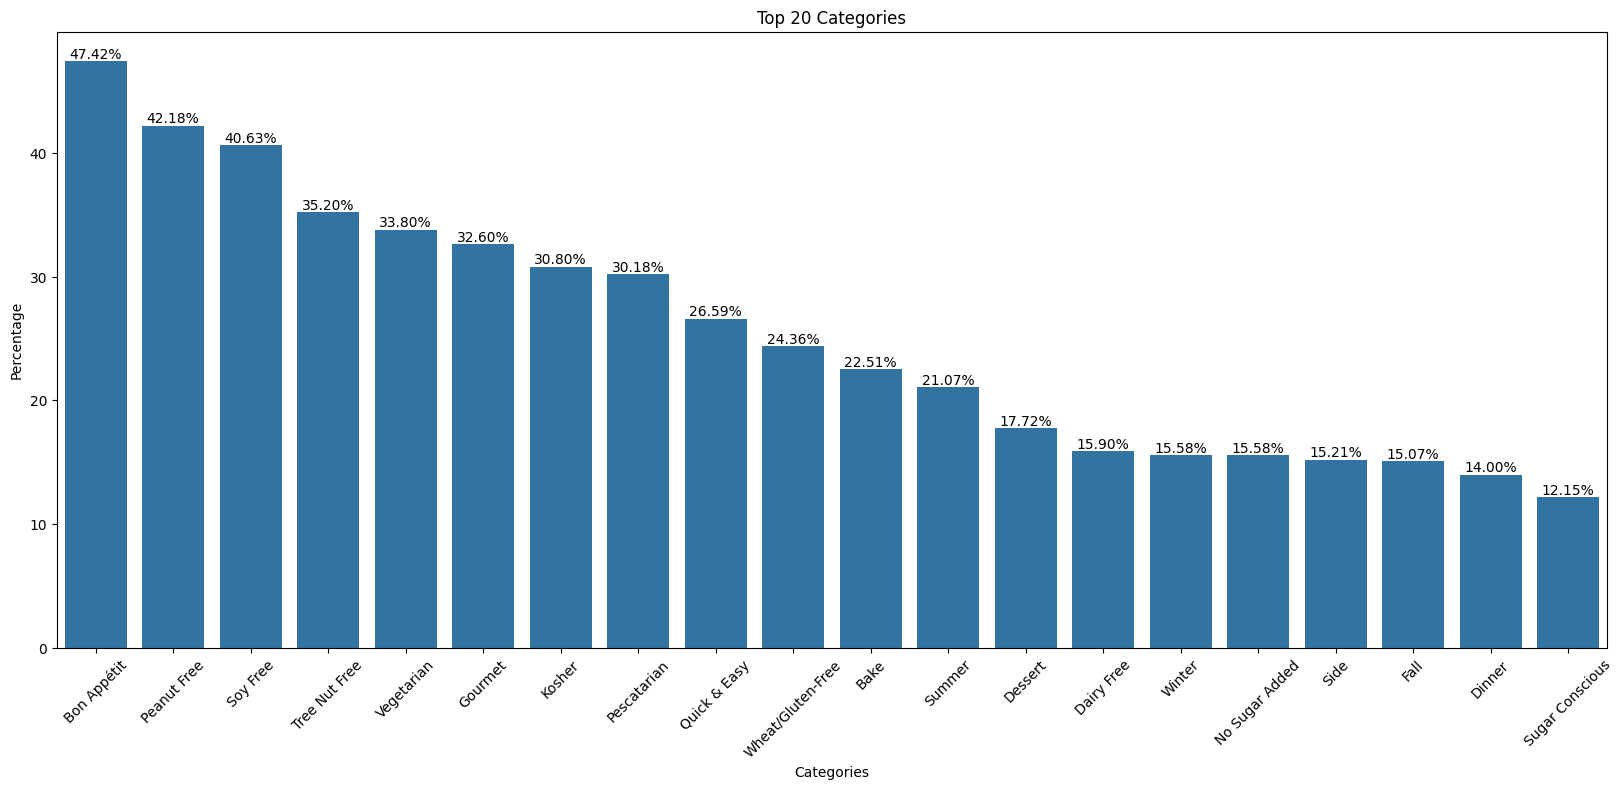

In [31]:
# bar chart of top 20 categories

plt.figure(figsize = (20,8))
ax = sns.barplot(x = categories_series.head(20).index, y = ((categories_series.head(20) / len(df)) * 100))

plt.xticks(rotation = 45)
plt.xlabel('Categories')
plt.ylabel('Percentage')
plt.title('Top 20 Categories')

# Add values on top of the bars
ax.bar_label(ax.containers[0], fmt='%.2f%%')

plt.show()

### Visualization of Top 20 Recipe Categories

We visualized the **top 20 recipe categories** based on the total number of recipes in each category. This bar chart provides insights into the categories that have the highest number of recipes.

#### Why This Is Important:
- **Category Popularity**: Categories with a large number of recipes suggest that they are popular among both recipe creators and users. The company can focus on these categories to ensure they are offering a wide range of recipes that cater to user preferences.
  

#### Business Impact:
- This analysis helps the company understand which categories have the most recipes and, therefore, the most user engagement.


In [32]:
# which category have avg rating grater then 4 and have miminum 200 recipes (or occrance)

cat_df = df.explode('categories')[['categories','rating']].groupby('categories').agg({'rating':'mean',
                    'categories':'count'}).rename(columns={'categories':'count','rating':'avg_rating'}).reset_index()

graph_df = cat_df[(cat_df.avg_rating > 4) & (cat_df['count'] > 200)].sort_values(by = 'count', ascending = False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Roast'),
  Text(1, 0, 'Mixer'),
  Text(2, 0, 'Marinate'),
  Text(3, 0, 'Broil'),
  Text(4, 0, 'Rosemary'),
  Text(5, 0, 'Lamb'),
  Text(6, 0, 'Low Carb'),
  Text(7, 0, 'Braise'),
  Text(8, 0, 'Goat Cheese'),
  Text(9, 0, "Father's Day"),
  Text(10, 0, 'Meat'),
  Text(11, 0, 'Arugula'),
  Text(12, 0, 'Steak')])

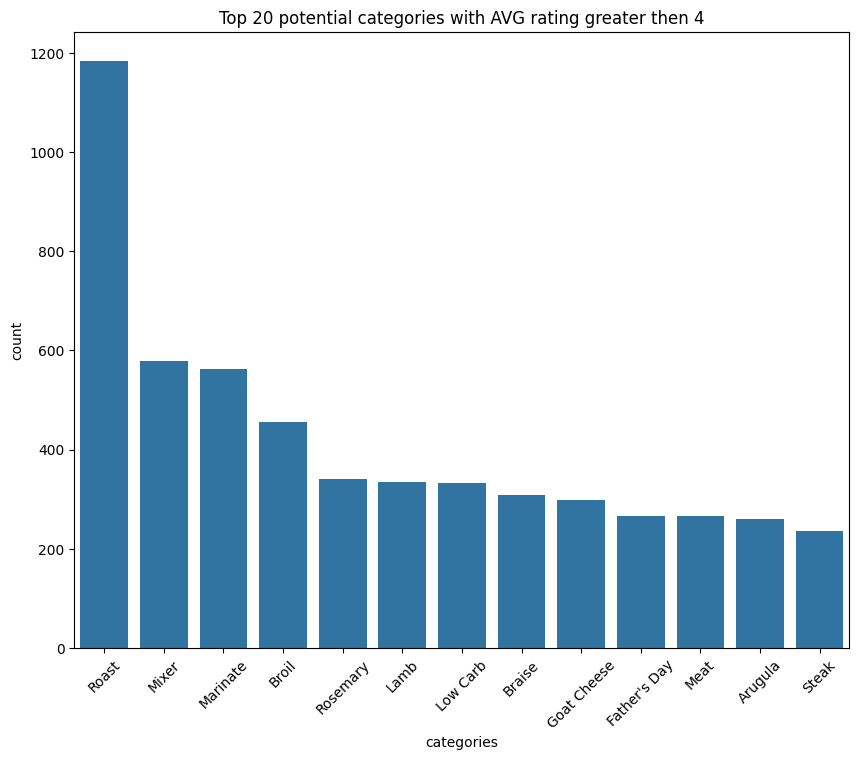

In [33]:

plt.figure(figsize = (10,8))
sns.barplot(x = graph_df.categories, y = graph_df['count'])

plt.title('Top 20 potential categories with AVG rating greater then 4')
plt.xticks(rotation = 45)

### Identifying High-Potential Recipe Categories

To help the company focus on the most successful recipe categories, we performed an analysis based on two key criteria:

1. **Average Rating**: We focused on categories where the average user rating is greater than 4. This indicates that recipes in these categories are generally well-received by users.
   
2. **Frequency of Occurrence**: We also considered how often recipes in each category appear in the dataset. Categories with over 200 occurrences were selected as these are popular and have a significant number of recipes.

#### NOTE:
By extracting categories that meet both criteria—high average ratings and a large number of occurrences—these categories represent potential areas for the company to focus its efforts on. These categories are not only popular but also consistently highly rated, making them a strong choice for further development, promotion, or marketing.

This analysis provides actionable insights into which recipe categories could drive growth for the company.


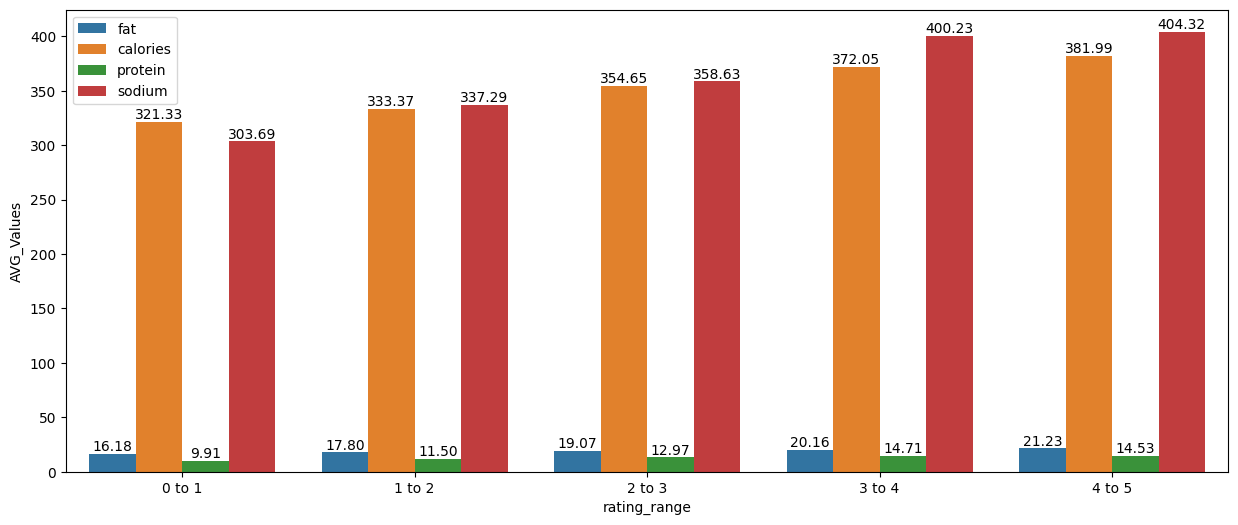

In [96]:
df['rating_range'] = np.where(df.rating <= 1, '0 to 1', np.where(df.rating <= 2, '1 to 2', np.where(df.rating <= 3, '2 to 3', np.where(df.rating <= 4, '3 to 4', '4 to 5'))))

mm = df.groupby('rating_range').agg({'fat':'mean','calories':'mean','protein':'mean','sodium':'mean'}).reset_index()

# conver this horizontal table to vartical table
mm = mm.melt(id_vars = 'rating_range', value_vars = ['fat','calories','protein','sodium'])


plt.figure(figsize = (15,6))
ax = sns.barplot(x = 'rating_range', y = 'value', data = mm, hue = 'variable')
plt.legend(loc = 'upper left')
plt.ylabel('AVG_Values')

ax.bar_label(ax.containers[0], fmt='%.2f')
ax.bar_label(ax.containers[1], fmt='%.2f')
ax.bar_label(ax.containers[2], fmt='%.2f')
ax.bar_label(ax.containers[3], fmt='%.2f')

plt.show()


1. **Created a new column called 'rating range'**:
   - **What**: We created a new column that categorizes the ratings into ranges.
   - **How**: If the rating is between 0 to 1, the 'rating range' column will have the category "0-1", and similarly for other ranges like "1-2", "2-3", and so on.
   - **Why**: The purpose of this new column is to better understand how nutritional values (calories, protein, fat, sodium) vary based on the rating range.

2. **Recalculated average nutritional values in each rating range**:
   - After creating the 'rating range' column, we recalculated the average calories, protein, fat, and sodium for recipes within each range. For example, for recipes rated between 4 and 5, we calculated the average nutritional values.
   - **Objective**: This analysis helps us identify what kind of nutritional values are associated with highly-rated recipes, so we can focus on those recipes for better content.


# NOTE:
By creating a 'rating range' column and recalculating the nutritional values for each range, we gain insight into the nutritional profile of recipes with different ratings. This allows us to focus more on recipes that have the same nutritional profile as 4 to 5 rated recipes  have.


In [62]:
# these are the top 11 highly rated recipes that are rated more then twice 
top_rated_r = df.groupby('title').agg({'rating':'mean','title':'count'}).rename(columns = {'title':'count',
'rating':'avg_rating'}).sort_values(by = ['avg_rating','count'], ascending = False).head(11)

top_rated_r

,avg_rating,count
title,,
Mint Julep,5.0,3
Baltimore Eggnog,5.0,2
Brandied Whipped Cream,5.0,2
Chimichurri,5.0,2
Homemade Ricotta Cheese,5.0,2
Love,5.0,2
Moroccan-Style Preserved Lemons,5.0,2
Potato Latkes,5.0,2
Romesco Sauce,5.0,2


In [68]:
# comman ingridient in highly rated racipes
top_10_ingridients = df[df.title.isin(top_rated_r.index)].explode('ingredients').groupby('ingredients').agg({'ingredients':'count'}
            ).rename(columns = {'ingredients':'count'}).sort_values(by = 'count', ascending = False).head(10)

top_10_ingridients

,count
ingredients,
crushed ice,2
8 cups whole milk,2
2/3 cup kosher salt,2
1/2 pint light rum,2
3 or 4 ice cubes,2
3 pints milk,2
1/2 pint peach brandy,2
"1 vanilla bean, split lengthwise",2
1/2 teaspoon lemon juice,2


### Analysis of Top Rated Recipes and Common Ingredients

We analyzed the **top-rated recipes** that received the maximum rating of 5 and have been rated at least **twice**. These recipes represent the highest-rated dishes in the dataset, and understanding their characteristics can help us identify what makes them stand out.

#### Key Insights:
- **Top 10 Common Ingredients**: From these highly-rated recipes, we extracted the top 10 most common ingredients. These ingredients are likely key contributors to the success of these dishes, as they appear frequently in recipes that users have rated highly.

#### Why This Is Important:
- **Recipe Success Factors**: Identifying the common ingredients in highly-rated recipes helps us understand which ingredients are most popular among users. This can guide the creation of new recipes or the improvement of existing ones by focusing on these key ingredients.
  
- **Business Focus**: By emphasizing recipes that feature these ingredients, the company can ensure that it is offering content that aligns with user preferences. This could lead to better user engagement and satisfaction, ultimately driving more business.

#### Note:
Understanding the ingredients that contribute to high user ratings provides actionable insights for improving the quality of recipes on the platform. By focusing on the top-rated recipes and their common ingredients, the company can prioritize creating or promoting recipes that are more likely to be well-received by users.


In [114]:
# distribution of the ingredients in famous category
recipies_in_top_20_c = df.explode('categories')[df.explode('categories').categories.isin(categories_series.head(20).index)].title.drop_duplicates()

<Axes: xlabel='fat', ylabel='Density'>

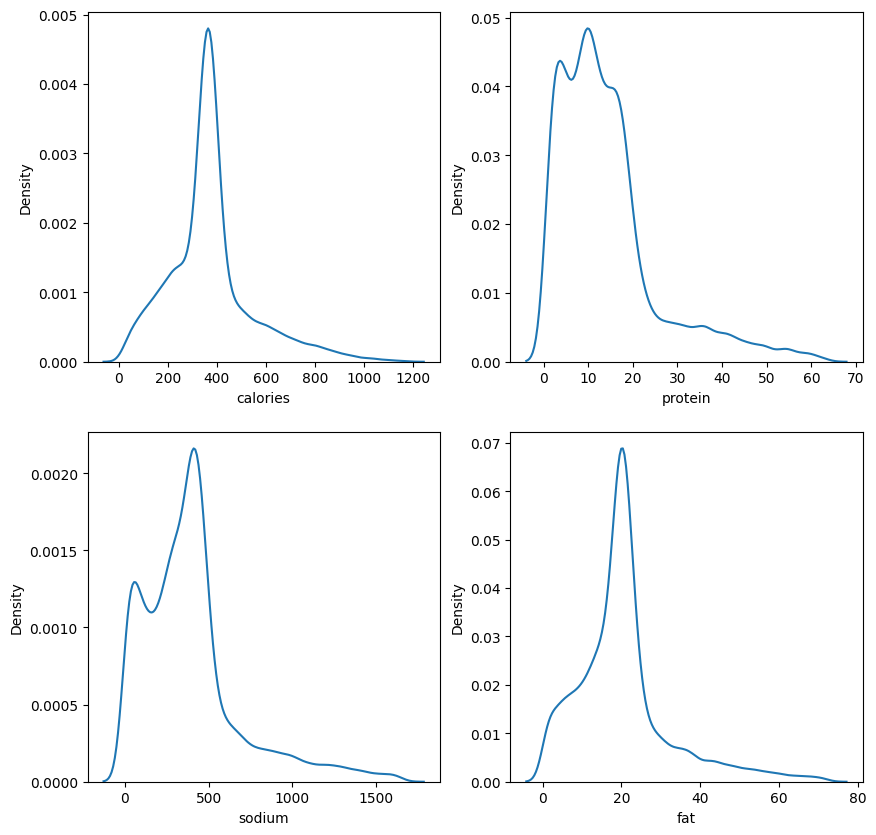

In [119]:
gg = df[df.title.isin(recipies_in_top_20_c)][['calories','protein','sodium','fat']]

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.kdeplot(gg.calories, ax=axes[0, 0])
sns.kdeplot(gg.protein, ax=axes[0, 1])
sns.kdeplot(gg.sodium, ax=axes[1, 0])
sns.kdeplot(gg.fat, ax=axes[1, 1])



### Findings on Nutritional Value Distribution in Top 20 Categories

After analyzing the recipes data, I created distribution plots of all the nutritional values (e.g., calories, fat, sodium, etc.) for the **top 20 categories**. These categories contain the majority of the data, which provides a comprehensive view of the nutritional content of the recipes that users are most interested in.

#### Key Insights:
- **Nutritional Value Range**: The distribution plots show the range of nutritional values where most of the recipes lie. By focusing on these ranges, the business can understand the typical nutritional profile that users prefer.
- **Recipe Preferences**: The majority of recipes fall within a specific range of nutritional values, indicating that users prefer recipes with certain nutritional characteristics.
  